## IE Marketing Intelligence Final Report
#### Author:  Shaurya Rawat 
#### Professor:  Sonia Casado
 We have two files: Training and Validation. <br>
 Algorithms Used: <br>
 1.Logistic Regression <br>
 2.Random Forest <br>

## Import the Libraries

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 16 19:56:34 2017

@author: Shaurya Rawat
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Read the Data and Plot the Targets(0 and 1)

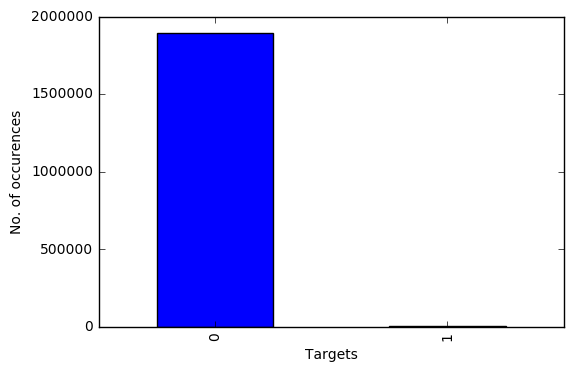

In [6]:
data=pd.read_csv("D:\IE MBD 2016\Marketing Intelligence\IE_MI_IndividualProject_data(1)\IE_MI_training.csv",delimiter=';')

data.columns
data.shape
#1898460,94

target_classes=pd.value_counts(data['target'],sort=True).sort_index()
target_classes.plot(kind='bar')
plt.xlabel('Targets')
plt.ylabel('No. of occurences')
plt.show()
#unbalanced data
# very less no. of 1's as compared to 0's in the target field

## Check for Null values 

In [7]:
data.isnull().any()
data=data.drop(['uuid'],axis=1)
freq_prov=data['prov'].mode()[0]
freq_prov
data['prov'].fillna(freq_prov,inplace=True)
# We find prov has null values
# So we replace it with the mode of the province which is 28,0- Madrid

## Split the Data into: Train and Test

In [8]:
from sklearn.cross_validation import train_test_split
train,test=train_test_split(data,test_size=0.20)

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Undersampling

In [9]:
def undersample(data,ratio=1):
    target=data[data['target']==1]
    not_target=data[data['target']==0].sample(n=ratio*len(target))
    return pd.concat([target,not_target]).sample(frac=1) 

undertrain=undersample(train)

y=undertrain['target']
X=undertrain.drop(['target'],axis=1)

## Apply Logistic Regression and Random Forest

In [10]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import auc,roc_curve

#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X,y)
score_logistic=np.mean(cross_val_score(clf,X,y,cv=4,scoring='roc_auc'))
#0.66035

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,y)
score_rf=np.mean(cross_val_score(rf,X,y,cv=4,scoring='roc_auc'))
#0.6842

## Get Predictions on the test set

In [11]:
#Evaluating
test2=test.drop(['target'],axis=1)
ypred=clf.predict_proba(test2)
ypred2=rf.predict_proba(test2)

## Plot the Logistic Regression AUC

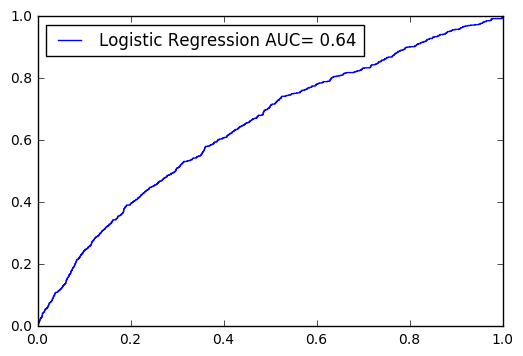

In [12]:
#lr
fpr,tpr,thresholds=roc_curve(test['target'],ypred[:,1])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label='Logistic Regression AUC= %0.2f'%(roc_auc))
plt.legend(loc='best')
#0.65

## Plot the Random Forest AUC

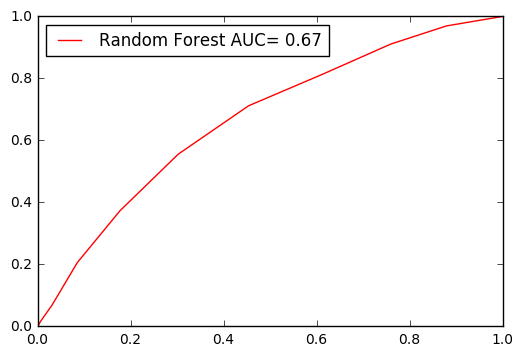

In [15]:
#rf
fpr,tpr,thresholds=roc_curve(test['target'],ypred2[:,1])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='Random Forest AUC= %0.2f'%(roc_auc))
plt.legend(loc='best')
#0.69

## Predict Values for Validation.txt and Store in CSV

In [ ]:
#Random Forest works best for us 0.69
pred_data=pd.read_csv("D:\IE MBD 2016\Marketing Intelligence\IE_MI_IndividualProject_data(1)\IE_MI_validation.csv",delimiter=';')
pred_data=pred_data.drop(['uuid'],axis=1)
pred_data['prov'].fillna(freq_prov,inplace=True)
final_pred=rf.predict(pred_data)
submission=pd.DataFrame({"UUID":test['uuid'],"Score":Y_pred})
submission.to_csv('shauryarawat_07052017.csv',index=False)